# Лабораторная работа №2 #
Найти корень уравнения  f(x) = 0 на отрезке [a,b],  
используя  следующие методы:  
* метод Ньютона-Рафсона;
* метод средней точки (поиск Больцано);
* метод секущих;


Решение уравнения x' найти с точностью не менее 10^-4.  
Построить график функции *f(x)* на отрезке. Указать число шагов,  
при котором достигается требуемая точность.
 
8) *f(x) = 1/3 * x^3 - (1 + x)(ln(1 + x) - 1)*,
на интервале: [-0,99; 0,5]

**ПРИМЕЧАНИЕ**: интервал по заданию [-0,5; 0,5], но он был изменен,  
дабы функция на концах отрезка принимала
значения разных знаков

***

Построим график функции


Функция f(x):


0.333333333333333*x**3 - (x + 1)*(log(x + 1) - 1)

Производная f(x):


1.0*x**2 + (-x - 1)/(x + 1) - log(x + 1) + 1

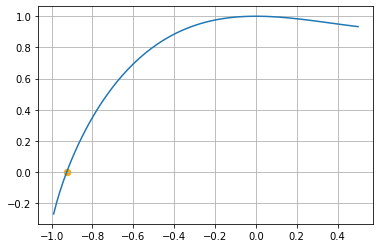

In [163]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from IPython.display import display

x = symbols('x')
func = (1/3) * x**3 - (1 + x) * (log(1 + x) - 1)
func_dif = diff(func, x)

print('Функция f(x):')
display(func)
print('Производная f(x):')
display(func_dif)

def f(x):
    return (1/3) * x**3 - (1 + x) * (np.log(np.abs(x+1)) - 1)

def f_d1(x):
    return x**2 + (-x-1)/(x+1)-np.log(np.abs(x+1))+1

a, b = [-0.99, 0.5]

x = np.linspace(a, b, 100)
f_x = f(x)

fig = plt.subplot()
fig.plot(x, f_x)
fig.grid()

x_0 = -0.92657

fig.scatter(x_0, f(x_0), color='orange', s=40, marker='o')
plt.show()

**Метод Ньютона-Рафсона**

In [164]:
def Newton(l,r):  
    x0 = r 
    xn = f_d1(x0)
    xn1 = xn - f(xn)/f_d1(xn)
    newton_counter = 1
    while abs(xn1-xn) > 10**(-5):
        xn = xn1 
        xn1 = xn - f(xn)/f_d1(xn)
        newton_counter += 1
    return xn1, newton_counter
   
#Функция для вывода digits чисел после запятой
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

res, newton_counter = Newton(a, b)
f_res = f(res)


print('Значение f(x) =', toFixed(f_res, 5), ' при x =', toFixed(res, 5))
print('Количество итераций:', newton_counter)  

Значение f(x) = -0.00000  при x = -0.92658
Количество итераций: 9


**Метод средней точки (поиск Больцано)**

In [165]:
def Bolc(l,r):
    bolc_counter = 0
    while f(r)-f(l) > 10**(-5):
        m = (l+r)/2
        
        if f(m)*f(r) < 0: 
            l = m
        if f(m)*f(l) < 0:
            r = m
        
        bolc_counter += 1

    return m, bolc_counter

res, bolc_counter = Bolc(a, b)
f_res = f(res)


print('Значение f(x) =', toFixed(f_res, 5), ' при x =', toFixed(res, 5))
print('Количество итераций:', bolc_counter)

Значение f(x) = 0.00000  при x = -0.92658
Количество итераций: 19


**Метод секущих**

In [166]:
def Sec(l, r):
    sec_counter = 0
    x0 = l
    x1 = r
    while np.abs(x1 - x0) > 10**(-5):
        xn = x0 - (f(x0)*(x1 - x0))/(f(x1)-f(x0))
        x0 = x1
        x1 = xn
        sec_counter +=1
    return x1, sec_counter

res, sec_counter = Sec(a,b)
f_res = f(res)

print('Значение f(x) =', toFixed(f_res, 5), ' при x =', toFixed(res, 5))
print('Количество итераций:', sec_counter)

Значение f(x) = 0.00000  при x = -0.92658
Количество итераций: 9


**Результаты**

In [167]:
from prettytable import PrettyTable

counter_names = ['', 'Метод Ньютона', 'Метод средней точки', 
    'Метод секущих']

counter_vals = ['Кол-во \n итераций', newton_counter, bolc_counter,
    sec_counter]

table = PrettyTable(counter_names)
table.add_row(counter_vals)
print(table)

+-----------+---------------+---------------------+---------------+
|           | Метод Ньютона | Метод средней точки | Метод секущих |
+-----------+---------------+---------------------+---------------+
|  Кол-во   |       9       |          19         |       9       |
|  итераций |               |                     |               |
+-----------+---------------+---------------------+---------------+
